# Regression

In [ ]:
import numpy as np
import scipy.stats as st



In [5]:
x  = np.array([0,3,7,10])
y = np.array([5,5,27,31])

model = st.linregress(x,y)

print(model)

LinregressResult(slope=3.0, intercept=2.0, rvalue=0.9454288003008773, pvalue=0.054571199699122705, stderr=0.7310832774866965, intercept_stderr=4.594787151274503)


In [7]:
# to find the predicted value given x = 3

print(3*model[0] + model[1])

11.0


## Interpreting regression parameters

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('http://data-analytics.zybooks.com/Reaction.csv')
df.head()

In [15]:
print(st.linregress(df['Drinks'],df['Reaction']))

LinregressResult(slope=6.000000000000001, intercept=3.9999999999999964, rvalue=0.9728166526882823, pvalue=0.0010983582017795293, stderr=0.7141428428542851, intercept_stderr=3.5227829907617076)


### Linear Regression

In [18]:
import statsmodels.formula.api as sms
import statsmodels.api as sm

## Math course data

####  An instructor for a math course wishes to investigate the relationship between students' final exam scores and coursework scores. Data is available for  students,  of whom claimed to "like math" at the beginning of the course.

In [19]:
d= {'Y':[90, 66, 78, 65, 65, 60, 63, 72, 54, 81, 58, 71, 70, 92],
   'X1':[82, 66, 72, 59, 86, 50, 60, 91, 46, 80, 68, 58, 88, 82],
   'Math':["yes", "no", "yes", "yes", "no", "yes", "no", "no", "no", "yes", "no", "yes", "no", "yes"]}

In [21]:
df = pd.DataFrame(d, columns =['X1','Math','Y'])
df

,X1,Math,Y
0,82,yes,90
1,66,no,66
2,72,yes,78
3,59,yes,65
4,86,no,65
5,50,yes,60
6,60,no,63
7,91,no,72
8,46,no,54
9,80,yes,81


## Modeling final exam score using coursework scores

In [23]:
model1 = sms.ols('Y~X1',data = df).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     7.242
Date:                Tue, 06 Sep 2022   Prob (F-statistic):             0.0196
Time:                        09:46:10   Log-Likelihood:                -50.102
No. Observations:                  14   AIC:                             104.2
Df Residuals:                      12   BIC:                             105.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.5640     12.804      2.856      0.0

C:\Users\Siddharth Kumar\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Modeling final exam score using coursework scores

#### First, the instructor ignores the information on whether a student likes math, and simply fits a simple linear regression model with  = final exam score (%) and  = coursework score (%).

eval_env: 1


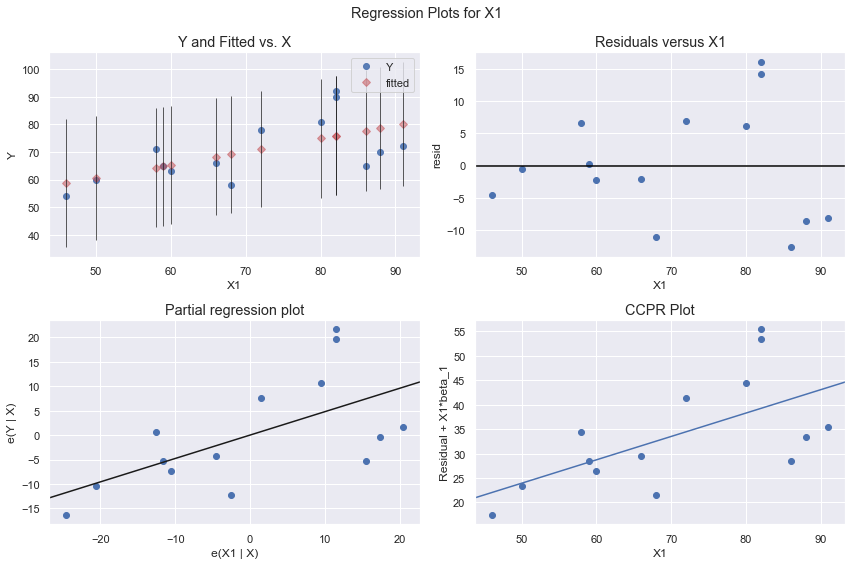

In [25]:
# define figure size
fig = plt.figure (figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model1,'X1',fig=fig)

In [27]:
model1.rsquared

0.37637451471359906

## Considering Math Column also

#### The instructor can include information on whether a student likes math. The multiple linear regression model predicts  = final exam score (%) using  = coursework score (%),  = indicator variable for liking math (0 = no, 1 = yes), and the interaction term .

In [29]:
model2 = sms.ols('Y~X1 + Math + X1*Math' , data = df).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     37.30
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           9.70e-06
Time:                        09:51:45   Log-Likelihood:                -35.903
No. Observations:                  14   AIC:                             79.81
Df Residuals:                      10   BIC:                             82.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         40.6212      6.688      6.

C:\Users\Siddharth Kumar\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### A residual plot and QQ plot for the regression model using coursework scores and a variable indicating whether a student likes math.

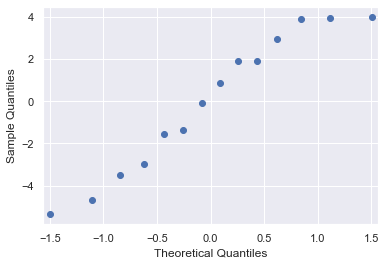

In [31]:
res = model2.resid #residuals
sm.qqplot(res)
plt.show()

In [33]:
model2.rsquared

0.917974325354588

#### Modeling final exam score using coursework scores and liking math.

In [36]:
from sklearn import linear_model

In [38]:
df = pd.get_dummies(df,drop_first = True)
df

,X1,Y,Math_yes
0,82,90,1
1,66,66,0
2,72,78,1
3,59,65,1
4,86,65,0
5,50,60,1
6,60,63,0
7,91,72,0
8,46,54,0
9,80,81,1


In [39]:
X =df[['X1','Math_yes']]
y= df['Y']

In [42]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [43]:
model.score(X,y)

0.8010981254630576